#### 1.1 Setup configuration

In [1]:
import pandas as pd
import numpy as np
import os
import sys

In [2]:
module_path = os.path.abspath(os.path.join('/Users/chenxintong/Desktop/Python/Walmart_LightGBM_project'))
if module_path not in sys.path:
    sys.path.append(module_path)
# from pbr_utils.ds_utils import ds_utils as ds_ut
# from pbr_utils.plot_utils import plot_utils as plt_ut

project_dir = module_path
data_dir = project_dir + "/data/"
cur_dir = project_dir + "/notebooks/"
image_dir = project_dir + "/images/"


#### 1.2 Data loading and preprocessing

In [3]:
m5_data = ['sell_prices.csv', 'sample_submission.csv', 'sales_train_validation.csv', 'sales_train_evaluation.csv', 'calendar.csv']

In [4]:
def display_df(df, message = ''):
    print("\n\n ----- data frame name is {} -----".format(message))
    num_rows = len(df)
    num_cols = len(df.columns)
    print("\n num_rows = {:,} \n num_cols = {:,}\n".format(num_rows, num_cols))
    display(df.head())
    print(df.info())

sp = pd.read_csv(data_dir + 'sell_prices.csv')
ste = pd.read_csv(data_dir + 'sales_train_evaluation.csv')
stv = pd.read_csv(data_dir + 'sales_train_validation.csv')
cal = pd.read_csv(data_dir + 'calendar.csv')

display_df(sp, "1.sell_prices")
display_df(ste, "2.sales_train_evaluation")
display_df(stv, "3.sales_train_validation")
display_df(cal, "4.calendar")



 ----- data frame name is 1.sell_prices -----

 num_rows = 6,841,121 
 num_cols = 4



,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None


 ----- data frame name is 2.sales_train_evaluation -----

 num_rows = 30,490 
 num_cols = 1,947



,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
None


 ----- data frame name is 3.sales_train_validation -----

 num_rows = 30,490 
 num_cols = 1,919



,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None


 ----- data frame name is 4.calendar -----

 num_rows = 1,969 
 num_cols = 14



,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB
None


#### 1.2.1 reduce memory size of dataframes

In [5]:
def reduce_mem_usage(df, category = False):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        
        else:
            if category:
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decrease by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [6]:
import gc
sp = reduce_mem_usage(sp)
ste = reduce_mem_usage(ste)
stv = reduce_mem_usage(stv)
cal = reduce_mem_usage(cal)
gc.collect()

Memory usage of dataframe is 208.77 MB
Memory usage after optimization is: 130.48 MB
Decrease by 37.5%
Memory usage of dataframe is 452.91 MB
Memory usage after optimization is: 96.13 MB
Decrease by 78.8%
Memory usage of dataframe is 446.40 MB
Memory usage after optimization is: 95.00 MB
Decrease by 78.7%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.12 MB
Decrease by 41.9%


0

#### 1.2.2 Create a function to create series (pivot)

In [7]:
def create_series_data(df, cal, sp, include_events = False):
    # melt
    df1 = pd.melt(df, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                    var_name = 'day', value_name='sales').dropna()
    
    # add calendar info
    df2 = df1.merge(cal, left_on='day', right_on='d', how = 'left')

    # select useful columns
    if include_events:
        df3 = df2[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day', 'sales', 'date', 'wm_yr_wk', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']]
    else:
        df3 = df2[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day', 'sales', 'date', 'wm_yr_wk']]
    
    # add sales prices
    df4 = df3.merge(sp, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
    return df4

#### 1.2.3 save data in various forms as pickle files

In [8]:
import pickle

def get_val_data(stv, cal, sp, include_events, dataa = 'val'):
    pickle_file = data_dir + 'val_data_{}{}.pkl'.format(dataa, include_events)
    print(pickle_file)
    if os.path.exists(pickle_file):
        print('loading {}'.format(pickle_file))
        val_data = pickle.load(open(pickle_file, 'rb'))
    else:
        val_data = create_series_data(stv, cal, sp, include_events)
        pickle.dump(val_data, open(pickle_file, 'wb'))
    return val_data

all_include_events = [True, False]
all_data_types = ['val', 'eval']
ss = stv
for i in [0,1]:
    for j in [0,1]:
        ss = stv
        if j == 1:
            ss = ste
        print('iter = {} {}'.format(i,j))
        val_data = get_val_data(ss, cal, sp, all_include_events[i], all_data_types[j])

gc.collect()

iter = 0 0
/Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valTrue.pkl
loading /Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valTrue.pkl
iter = 0 1
/Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_evalTrue.pkl
loading /Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_evalTrue.pkl
iter = 1 0
/Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valFalse.pkl
loading /Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valFalse.pkl
iter = 1 1
/Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_evalFalse.pkl
loading /Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_evalFalse.pkl


0

#### 1.2.4 Useful function for dataframe summary

In [9]:
val_data = get_val_data(stv, cal, sp, False, 'val')
def summarize_columns(df):
    num_rows = len(df)
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['col_name'] = summary['index']
    summary = summary[['col_name', 'dtypes']]
    summary['missing'] = df.isnull().sum().values
    summary['missing_percent'] = summary['missing'].apply(lambda x: round(x*100/num_rows, 1))
    summary['uniques'] = df.nunique().values
    summary['first value'] = df.iloc[0].values
    summary['second value'] = df.iloc[1].values
    summary['third value'] = df.iloc[2].values
    return summary

/Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valFalse.pkl
loading /Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valFalse.pkl


#### 1.2.5 Overall distribution at different categories

In [10]:
summary_df = summarize_columns(val_data)
summary_df.head(25)

,col_name,dtypes,missing,missing_percent,uniques,first value,second value,third value
0,id,object,0,0.0,30490,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation
1,item_id,object,0,0.0,3049,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003
2,dept_id,object,0,0.0,7,HOBBIES_1,HOBBIES_1,HOBBIES_1
3,cat_id,object,0,0.0,3,HOBBIES,HOBBIES,HOBBIES
4,store_id,object,0,0.0,10,CA_1,CA_1,CA_1
5,state_id,object,0,0.0,3,CA,CA,CA
6,day,object,0,0.0,1913,d_1,d_1,d_1
7,sales,int16,0,0.0,419,0,0,0
8,date,object,0,0.0,1913,2011-01-29,2011-01-29,2011-01-29
9,wm_yr_wk,int16,0,0.0,274,11101,11101,11101


In [11]:
state_dist = val_data.groupby(['state_id'])['sales'].sum().reset_index()
state_dist

,state_id,sales
0,CA,28675547.0
1,TX,18899006.0
2,WI,18120856.0


In [12]:
store_dist = val_data.groupby(['store_id'])['sales'].sum().reset_index()
store_dist

,store_id,sales
0,CA_1,7698216.0
1,CA_2,5685475.0
2,CA_3,11188180.0
3,CA_4,4103676.0
4,TX_1,5595292.0
5,TX_2,7214384.0
6,TX_3,6089330.0
7,WI_1,5149062.0
8,WI_2,6544012.0
9,WI_3,6427782.0


#### 

In [13]:
dept_dist = val_data.groupby(['dept_id'])['sales'].sum().reset_index()
dept_dist

,dept_id,sales
0,FOODS_1,5088041.0
1,FOODS_2,7629822.0
2,FOODS_3,32372076.0
3,HOBBIES_1,5596460.0
4,HOBBIES_2,528340.0
5,HOUSEHOLD_1,11500526.0
6,HOUSEHOLD_2,2980144.0


In [14]:
cat_dist = val_data.groupby(['cat_id'])['sales'].sum().reset_index()
cat_dist

,cat_id,sales
0,FOODS,45089939.0
1,HOBBIES,6124800.0
2,HOUSEHOLD,14480670.0


#### 1.3 Visualization

<AxesSubplot:xlabel='state_id'>

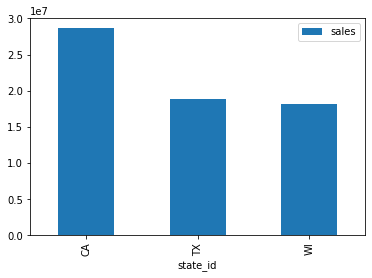

In [15]:
state_dist.set_index('state_id').plot(kind='bar')

<AxesSubplot:xlabel='state_id,cat_id'>

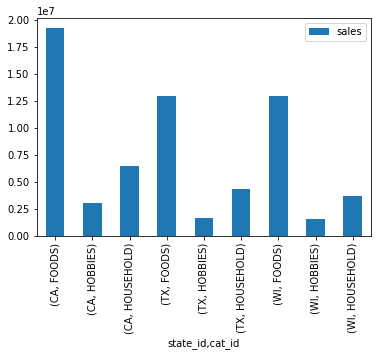

In [16]:
cat_state_dist = val_data.groupby(['state_id', 'cat_id'])['sales'].sum().reset_index()
cat_state_dist.set_index(['state_id', 'cat_id']).plot(kind = 'bar')

#### 1.3.1 Plotting individual series of an id

In [17]:
val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


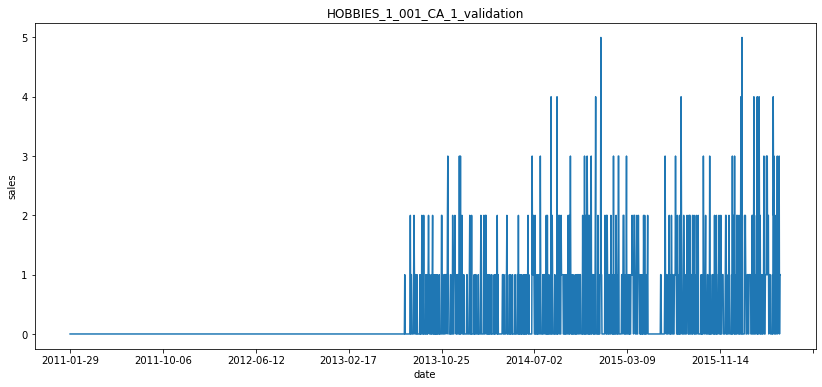

In [18]:
def plot_single_id(df, _id, start = '', end = ''):
    row_mask = df['id'] == _id
    tr_df = df[row_mask][['date', 'sales']].copy()
    tr_df.set_index('date', inplace = True)
    tr_df.loc[start:].sales.plot(figsize=(14,6), title = _id, ylabel = 'sales')

plot_single_id(val_data, 'HOBBIES_1_001_CA_1_validation')

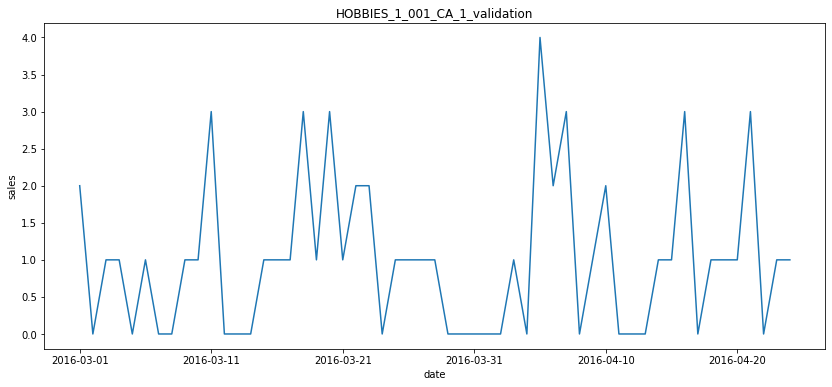

In [19]:
plot_single_id(val_data, 'HOBBIES_1_001_CA_1_validation', start='2016-03', end='2016-04')

#### 1.4 Prophet Model

In [20]:
def get_prophet_item_data(df, _id, for_prophet = True, freq = None):
    row_mark = df['id'] == _id
    tr_df = df[row_mark][['date', 'sales']].copy()
    tr_df.columns = ['ds','y']
    return tr_df

In [21]:
from prophet import Prophet
_id = 'HOBBIES_1_001_CA_1_validation'
def get_prophet_predictions(val_data, _id):
    tr_df = get_prophet_item_data(val_data, _id)
    m = Prophet(daily_seasonality = True, weekly_seasonality = True, yearly_seasonality = True)
    m.fit(tr_df)
    future = m.make_future_dataframe(periods=28, freq='D', include_history=False)
    forecast = m.predict(future)
    pred = forecast[['ds', 'yhat']].copy()
    pred['item_id'] = _id
    pred.columns = ['date', 'sales', 'id']
    pred = pred[['date', 'id', 'sales']]
    return pred

In [22]:
import warnings
warnings.filterwarnings('ignore')
all_ids = list(val_data.id.unique())
all_ids = all_ids[:10]

from tqdm import tqdm
pred_res_list = []

for i in tqdm(range(len(all_ids))):
    pred = get_prophet_predictions(val_data, all_ids[i])
    pred_res_list.append(pred)

  0%|          | 0/10 [00:00<?, ?it/s]15:29:33 - cmdstanpy - INFO - Chain [1] start processing
15:29:33 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 1/10 [00:03<00:34,  3.87s/it]15:29:37 - cmdstanpy - INFO - Chain [1] start processing
15:29:37 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 2/10 [00:07<00:28,  3.57s/it]15:29:40 - cmdstanpy - INFO - Chain [1] start processing
15:29:40 - cmdstanpy - INFO - Chain [1] done processing
 30%|███       | 3/10 [00:10<00:24,  3.49s/it]15:29:43 - cmdstanpy - INFO - Chain [1] start processing
15:29:44 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 4/10 [00:14<00:20,  3.47s/it]15:29:47 - cmdstanpy - INFO - Chain [1] start processing
15:29:47 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 5/10 [00:17<00:17,  3.42s/it]15:29:50 - cmdstanpy - INFO - Chain [1] start processing
15:29:50 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 6/10 [00:20<00:13,  3.42s/it]15:29:54

In [23]:
combined_df = pd.concat(pred_res_list)
display(combined_df.head())
pivot_df = combined_df.pivot(index = 'id', columns = 'date', values = 'sales').reset_index()
pivot_df.columns = ['id'] + ['F' + str(x) for x in range(1,29)]
pivot_df['id'] = pivot_df['id'].str.replace('validation', 'evaluation')
pivot_df.head()

,date,id,sales
0,2016-04-25,HOBBIES_1_001_CA_1_validation,0.757460
1,2016-04-26,HOBBIES_1_001_CA_1_validation,0.817553
2,2016-04-27,HOBBIES_1_001_CA_1_validation,0.701698
3,2016-04-28,HOBBIES_1_001_CA_1_validation,0.691933
4,2016-04-29,HOBBIES_1_001_CA_1_validation,0.744274


,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_evaluation,0.757460,0.817553,0.701698,0.691933,0.744274,0.891395,0.767924,0.716343,0.775144,...,0.646664,0.793417,0.670272,0.619810,0.680608,0.566308,0.559052,0.614947,0.766742,0.649122
1,HOBBIES_1_002_CA_1_evaluation,0.147535,0.159257,0.176505,0.228476,0.256287,0.346842,0.289142,0.236322,0.256435,...,0.430150,0.506896,0.432150,0.359469,0.357400,0.357239,0.388579,0.393030,0.458059,0.373294
2,HOBBIES_1_003_CA_1_evaluation,0.645905,0.655345,0.653766,0.666908,0.705854,0.781570,0.693107,0.640243,0.651195,...,0.732837,0.813538,0.729703,0.680948,0.695347,0.698440,0.715797,0.758344,0.836909,0.750428
3,HOBBIES_1_004_CA_1_evaluation,1.566623,1.244236,1.183113,1.592209,1.588889,2.679311,3.288745,1.547935,1.236235,...,1.689319,2.790402,3.407493,1.670997,1.360001,1.306916,1.720317,1.717264,2.803696,3.404763
4,HOBBIES_1_005_CA_1_evaluation,0.681564,0.601426,0.700744,0.632332,0.704628,1.145556,1.054866,0.532488,0.467851,...,0.847984,1.357219,1.334740,0.878967,0.877840,1.056547,1.066233,1.213664,1.725137,1.698853


In [24]:
ste_sub = ste[ste['id'].isin(list(pivot_df.id.unique()))]
display(ste_sub.head())
d_list = []
for i in range(1942-28, 1942, 1):
    d_list.append('d_{}'.format(i))
columns_to_select = ['id'] + d_list
ste_sub = ste_sub[columns_to_select]
display(ste_sub.head())

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


,id,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,0,0,0,2,0,3,5,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,0,1,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,0,0,1,1,0,2,1,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,0,0,1,2,4,1,6,4,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,1,0,2,3,1,0,3,2,3,...,0,0,0,2,1,0,0,2,1,0


#### 1.5 LightGBM Model

#### 1.5.1 add lag data (28 days to 34 days)

In [25]:
dayLags = [28, 29, 30, 31, 32, 33, 34]
def add_lags(val_data, dayLags = [28, 29, 30, 31, 32, 33, 34]):
    print('adding lag features...')
    lagSalesCols = [f'lag_{dayLags}' for dayLag in dayLags]
    for dayLag in dayLags:
        col_name = 'lag_{}'.format(dayLag)
        val_data[col_name] = val_data[['id', 'sales']].groupby('id')['sales'].shift(dayLag).fillna(-1)
    return val_data

#### 1.5.2 add rolling_mean based on a window from 28 days and back

In [26]:
windows = [7, 14, 28]
dayLag = [28]
def add_window_features(val_data, windows = [7,14,28], dayLag = [28]):
    print('adding window features...')
    lag_col = 'lag_{}'.format(dayLag[0])
    for window in windows:
        val_data[f'rmean_28_{window}'] = val_data[['id', lag_col]].groupby('id')[lag_col].transform(lambda x: x.rolling(window, min_periods = 1).mean())
    return val_data
val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


#### 1.5.3 add time variables

In [27]:
def add_daytime_cols_all(df, date_field):
    print('adding date and time features...')
    df[date_field] = pd.to_datetime(df[date_field])
    df[date_field + '_dayofweek'] = df[date_field].dt.dayofweek.astype('uint8')
    df[date_field + '_dayofyear'] = df[date_field].dt.dayofyear.astype('uint8')
    df[date_field + '_weekofyear'] = df[date_field].dt.weekofyear.astype('uint8')
    df[date_field + '_month'] = df[date_field].dt.month.astype('uint8')
    df[date_field + '_year'] = df[date_field].dt.year.astype('uint8')
    df[date_field + '_quarter'] = df[date_field].dt.quarter.astype('uint8')
    return df
val_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


#### 1.5.4 add categorical values

In [28]:
def add_categorical_data(val_data, cat_feats):
    print('label_encoding cat variables...')
    print(cat_feats)
    for cc in cat_feats:
        le = LabelEncoder()
        val_data[cc] = le.fit_transform(val_data[cc])
    return val_data

In [31]:
import gc
gc.collect()
from sklearn.preprocessing import LabelEncoder
include_events = True
val_data = get_val_data(stv, cal, sp, include_events, 'val')
val_data.head()

def prepare_val_data(val_data, include_events):
    prep_data_pkl = data_dir + 'prepared_data_{}.pkl'.format(include_events)
    if os.path.exists(prep_data_pkl):
        val_data = pickle.load(open(prep_data_pkl, 'rb'))
    else:
        val_data = add_lags(val_data)
        val_data = add_window_features(val_data)
        val_data = add_daytime_cols_all(val_data, 'date')
    
    return val_data


val_data = prepare_val_data(val_data, True)
gc.collect()
val_data.head()

/Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valTrue.pkl
loading /Users/chenxintong/Desktop/Python/Walmart_LightGBM_project/data/val_data_valTrue.pkl
adding lag features...
adding window features...
adding date and time features...


,id,item_id,dept_id,cat_id,store_id,state_id,day,sales,date,wm_yr_wk,...,lag_34,rmean_28_7,rmean_28_14,rmean_28_28,date_dayofweek,date_dayofyear,date_weekofyear,date_month,date_year,date_quarter
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,-1.0,-1.0,-1.0,-1.0,5,29,4,1,219,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,-1.0,-1.0,-1.0,-1.0,5,29,4,1,219,1
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,-1.0,-1.0,-1.0,-1.0,5,29,4,1,219,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,-1.0,-1.0,-1.0,-1.0,5,29,4,1,219,1
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,-1.0,-1.0,-1.0,-1.0,5,29,4,1,219,1


In [32]:
prep_data_pkl = data_dir + 'prepared_data_{}.pkl'.format(include_events)
if not os.path.exists(prep_data_pkl):
    pickle.dump(val_data, open(prep_data_pkl, 'wb'))

In [33]:
val_data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day',
       'sales', 'date', 'wm_yr_wk', 'event_name_1', 'event_name_2',
       'event_type_1', 'event_type_2', 'sell_price', 'lag_28', 'lag_29',
       'lag_30', 'lag_31', 'lag_32', 'lag_33', 'lag_34', 'rmean_28_7',
       'rmean_28_14', 'rmean_28_28', 'date_dayofweek', 'date_dayofyear',
       'date_weekofyear', 'date_month', 'date_year', 'date_quarter'],
      dtype='object')

In [34]:
cat_feats = ['item_id', 'dept_id', 'store_id', 'cat_id', 'state_id']
event_cats = ['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']\

if include_events:
    cat_feats = cat_feats + ['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']
    for event in event_cats:
        val_data[event] = val_data[event].fillna('not_available')
print(cat_feats)
for cc in cat_feats:
    print(cc)
    le = LabelEncoder()
    val_data[cc] = le.fit_transform(val_data[cc])

['item_id', 'dept_id', 'store_id', 'cat_id', 'state_id', 'event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']
item_id
dept_id
store_id
cat_id
state_id
event_name_1
event_name_2
event_type_1
event_type_2


In [35]:
list(val_data['event_type_2'].unique())

[2, 0, 1]

#### 1.5.5 Create training and validation data to tune model parameters

In [36]:
cutoff = val_data.date.max() - pd.to_timedelta(28, unit='D')
xtrain = val_data.loc[val_data.date <= cutoff].copy()
xvalid = val_data.loc[val_data.date > cutoff].copy()
ytrain = xtrain['sales'].copy()
yvalid = xvalid['sales'].copy()
drop_cols = ['id', 'sales', 'day', 'date', 'wm_yr_wk']
xtrain.drop(drop_cols, axis = 1, inplace = True)
xvalid.drop(drop_cols, axis = 1, inplace = True)
xtrain.head()
gc.collect()

In [ ]:
import lightgbm as lgb
dtrain = lgb.Dataset(xtrain, label = ytrain, categorical_feature = cat_feats, free_raw_data = False)
dvalid = lgb.Dataset(xvalid, label = yvalid, categorical_feature = cat_feats, free_raw_data = False)
del xtrain, xvalid
gc.collect()
params = {
    'objective':'tweedie',
    'metric':'rmse',
    'learning_rate':0.075,
    'sub_feature':0.8,
    'sub_row':0.8,
    'bagging_freq':1,
    'lambda_12':0.1,
    'num_iterations':500,
    'num_leaves':128
}

if not os.path.exists(data_dir + 'lgb_model.pkl'):
    m_lgb = lgb.train(params, dtrain, valid_sets = [dtrain, dvalid], early_stopping_rounds = 150, verbose_eval = 100)
    pickle.dump = (m_lgb, open(data_dir + 'lgb_model.pkl', 'wb'))
else:
    pickle.load(open(data_dir + 'lgb_model.pkl', 'rb'))

#### 1.5.6 Save model and compute rmse

In [ ]:
cutoff = val_data.date.max() - pd.to_timedelta(28, unit = 'D')
xvalid = val_data.loc[val_data.date > cutoff].copy()
xvalid.drop(drop_cols, axis = 1, inplace = True)
preds = m_lgb.predict(xvalid)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(val_data.loc[val_data.date > cutoff]['sales'], preds, squared = False)
print(rmse)

#### 1.5.7 Steps to write in submission format (need evaluation file)

In [ ]:
valid_mask = val_data.date > cutoff
val_data = prepare_val_data(val_data, True)
output_df = val_data[valid_mask]
output_df['preds'] = preds
output_df.head()

In [ ]:
output_df['preds'] = preds
out_pivot_df = output_df.pivot(index = 'id', columns = 'date', values = 'preds').reset_index()
out_pivot_df.columns = ['id'] + ['F' + str(x) for x in range(1,29)]
out_pivot_df.head()